In [3]:
# Import our working modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# Load Lending Club Info dataset
info = pd.read_csv('lending_club_info.csv')

# Display the first few rows to confirm the loading
info.head(30)

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [12]:
# Load the lending club loan two
df = pd.read_csv('lending_club_loan_two.csv')

# Display the first few rows to confirm the loading
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [13]:
# Check for duplicates to ensure unique loans
print(f"Number of rows: {len(df)}")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of rows: 396030
Number of duplicate rows: 0


In [14]:
# If an 'id' or 'member_id' column exists, check uniqueness
if 'id' in df.columns:
    print(f"Number of unique IDs: {df['id'].nunique()}")
elif 'member_id' in df.columns:
    print(f"Number of unique member IDs: {df['member_id'].nunique()}")
else:
    print("No ID column found, relying on row count for uniqueness.")

No ID column found, relying on row count for uniqueness.


In [15]:
# Display column names and sample values
print("Columns:", df.columns.tolist())
print(df[['loan_amnt', 'int_rate', 'loan_status']].head())

Columns: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address']
   loan_amnt  int_rate  loan_status
0    10000.0     11.44   Fully Paid
1     8000.0     11.99   Fully Paid
2    15600.0     10.49   Fully Paid
3     7200.0      6.49   Fully Paid
4    24375.0     17.27  Charged Off


In [16]:
# List expected columns (excluding optional ones for now)
expected_columns = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
    'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'
]
missing_columns = [col for col in expected_columns if col not in df.columns]
print("Missing columns:", missing_columns)

Missing columns: []


In [17]:
# Display data types
print(df.dtypes)

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object


In [18]:
# Display unique loan_status values
print("Unique loan_status values:", df['loan_status'].unique())
print("\nValue counts:")
print(df['loan_status'].value_counts())

Unique loan_status values: ['Fully Paid' 'Charged Off']

Value counts:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64


In [19]:
# Print number of rows and columns
print(f"Dataset shape: {df.shape}")

Dataset shape: (396030, 27)


In [20]:
# Calculate missing values
print(df[expected_columns].isnull().sum())
print("\nPercentage missing:")
print(df[expected_columns].isnull().mean() * 100)

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

Percentage missing:
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
dti

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

Percentage distribution:
loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64


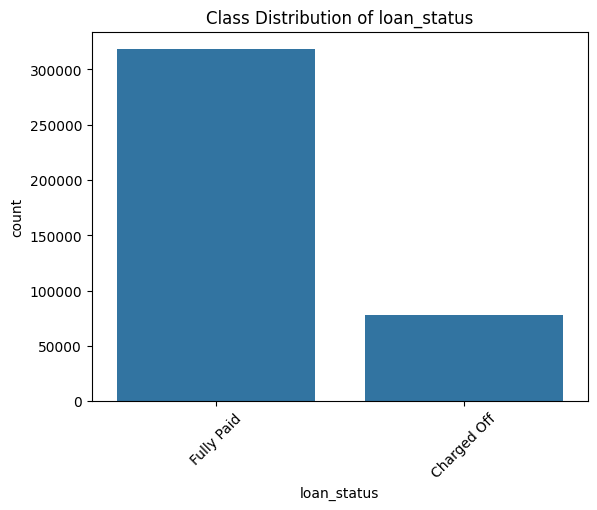

In [25]:
# Display class distribution
print(df['loan_status'].value_counts())
print("\nPercentage distribution:")
print(df['loan_status'].value_counts(normalize=True) * 100)

# Visualize class distribution
sns.countplot(x='loan_status', data=df)
plt.title('Class Distribution of loan_status')
plt.xticks(rotation=45)
plt.show()

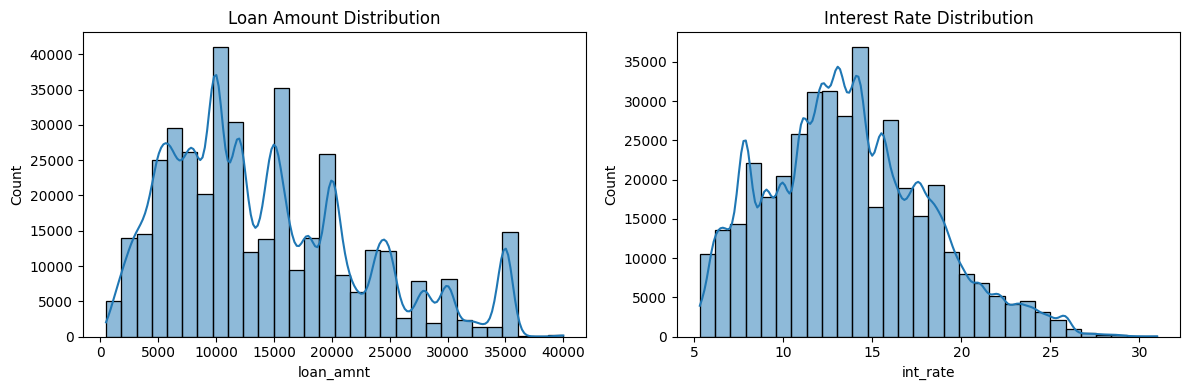

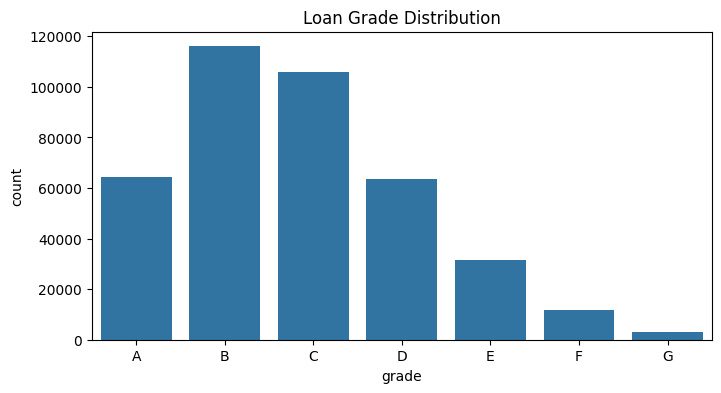

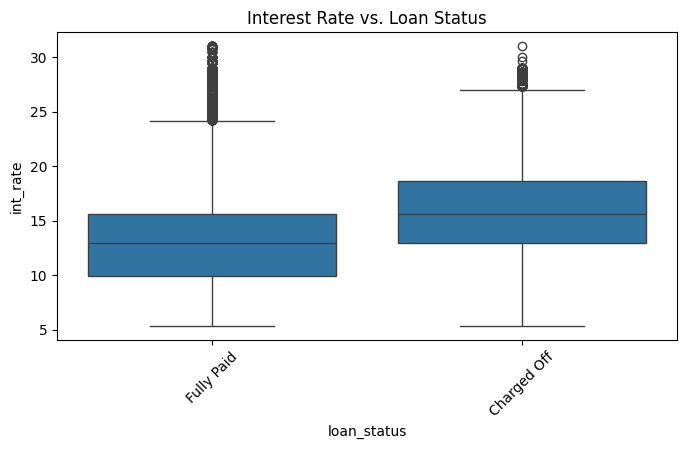

In [23]:
# Numerical features: Distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['int_rate'], bins=30, kde=True)
plt.title('Interest Rate Distribution')
plt.tight_layout()
plt.show()

# Categorical features: Count
plt.figure(figsize=(8, 4))
sns.countplot(x='grade', data=df, order=sorted(df['grade'].dropna().unique()))
plt.title('Loan Grade Distribution')
plt.show()

# Feature-target relationship: int_rate vs. loan_status
plt.figure(figsize=(8, 4))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Interest Rate vs. Loan Status')
plt.xticks(rotation=45)
plt.show()